In [1]:
import numpy as np

In [2]:
a = np.arange(0, 5)
a>5

array([False, False, False, False, False])

In [3]:
a==5

array([False, False, False, False, False])

In [4]:
from scipy import fft
len(fft.fftfreq(100))

100

In [5]:
x = np.array([
    [[1, 2, 3], [4, 5, 6], [7, 8, 9]],
    [[10, 11, 12], [13, 14, 15], [16, 17, 18]]
])
x, x.shape

(array([[[ 1,  2,  3],
         [ 4,  5,  6],
         [ 7,  8,  9]],
 
        [[10, 11, 12],
         [13, 14, 15],
         [16, 17, 18]]]),
 (2, 3, 3))

In [6]:
fn = lambda x: x+1
np.apply_along_axis(fn, 0, x)

array([[[ 2,  3,  4],
        [ 5,  6,  7],
        [ 8,  9, 10]],

       [[11, 12, 13],
        [14, 15, 16],
        [17, 18, 19]]])

In [7]:
def f(y):
    print(y.shape)
    return 0

x = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]])
np.apply_along_axis(f, 1, x)

(3,)
(3,)
(3,)
(3,)


array([0, 0, 0, 0])

In [8]:
x.shape

(4, 3)

In [9]:
x = np.zeros((265, 2, 100))
x = y = np.zeros((265, 100))
def f(a, b):
    print(a.shape, b.shape)
    return a
np.vectorize(f, signature="(m), (m)->(m)")(x, y)

(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,) (100,)
(100,)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [10]:
x = np.zeros((265, 100))
x_train = x[0: 7*(len(x)//10)]
x_test = x[7*(len(x)//10): ]
x_train.shape, x_test.shape

((182, 100), (83, 100))

In [11]:
len(x)//7

37

In [12]:
a = (1, 2)
(*a, 5)

(1, 2, 5)

In [13]:
def readucr(filename):
    data = np.loadtxt(filename, delimiter="\t")
    y = data[:, 0]
    x = data[:, 1:]
    return x, y.astype(int)


root_url = "https://raw.githubusercontent.com/hfawaz/cd-diagram/master/FordA/"

x_train, y_train = readucr(root_url + "FordA_TRAIN.tsv")
x_test, y_test = readucr(root_url + "FordA_TEST.tsv")

In [14]:
x_train.shape

(3601, 500)

In [15]:
y_train.shape

(3601,)

In [16]:
import yfinance as yf
df = yf.download("AAPL", period="max", interval="60m")
df.shape

[*********************100%***********************]  1 of 1 completed

ERROR 
1 Failed download:
ERROR ['AAPL']: Exception('AAPL: 1h data not available for startTime=345479400 and endTime=1687700658. The requested range must be within the last 730 days.')


(0, 6)

In [17]:
x = np.zeros((265, 100))
np.sum(x, 0).shape

(100,)

In [18]:
import optim as o
import GetData as gd

In [19]:
import scipy as sp
def filter(y, cf, order=4):
    nyquist = 0.5
    norm_cf = cf/nyquist
    b, a = sp.signal.butter(order, norm_cf)
    return sp.signal.filtfilt(b, a, y)

[*********************100%***********************]  1 of 1 completed


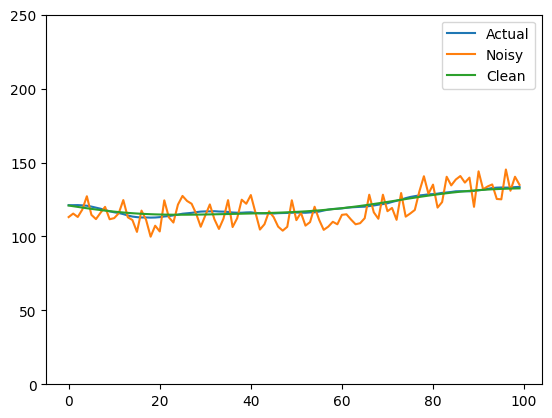

In [20]:
import matplotlib.pyplot as plt
y = gd.get_data("AAPL")[100]
x = np.arange(0, 100)
n = gd.corrupt_1(y.copy())
freqs = fft.fftshift(fft.fftfreq(100))
idx = o.optim(y, n)
idx = idx==1
cf = freqs[idx]
filtered = filter(y, cf)
plt.plot(x, y, label="Actual")
plt.plot(x, n, label="Noisy")
plt.plot(x, filtered, label="Clean")
plt.ylim((0, 250))
plt.legend()

[*********************100%***********************]  1 of 1 completed


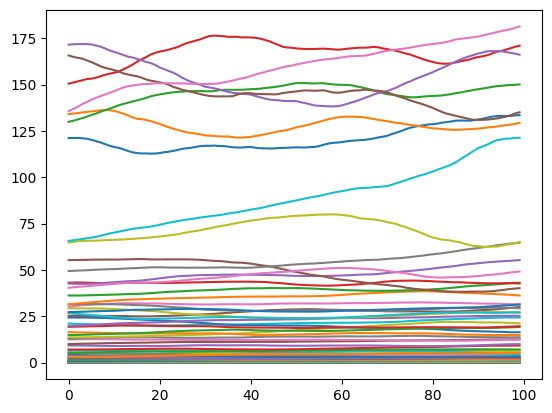

In [21]:
y = gd.get_data("AAPL")
x = np.arange(0, 100)
for i in y:
    plt.plot(x, i)
    

In [25]:
x = np.zeros(100)
x+np.random.uniform(-5, 5)

array([-2.40390151, -2.40390151, -2.40390151, -2.40390151, -2.40390151,
       -2.40390151, -2.40390151, -2.40390151, -2.40390151, -2.40390151,
       -2.40390151, -2.40390151, -2.40390151, -2.40390151, -2.40390151,
       -2.40390151, -2.40390151, -2.40390151, -2.40390151, -2.40390151,
       -2.40390151, -2.40390151, -2.40390151, -2.40390151, -2.40390151,
       -2.40390151, -2.40390151, -2.40390151, -2.40390151, -2.40390151,
       -2.40390151, -2.40390151, -2.40390151, -2.40390151, -2.40390151,
       -2.40390151, -2.40390151, -2.40390151, -2.40390151, -2.40390151,
       -2.40390151, -2.40390151, -2.40390151, -2.40390151, -2.40390151,
       -2.40390151, -2.40390151, -2.40390151, -2.40390151, -2.40390151,
       -2.40390151, -2.40390151, -2.40390151, -2.40390151, -2.40390151,
       -2.40390151, -2.40390151, -2.40390151, -2.40390151, -2.40390151,
       -2.40390151, -2.40390151, -2.40390151, -2.40390151, -2.40390151,
       -2.40390151, -2.40390151, -2.40390151, -2.40390151, -2.40

[*********************100%***********************]  1 of 1 completed


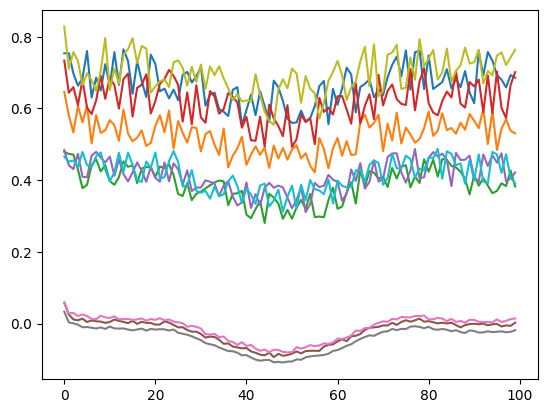

In [32]:
import augment as aug
y = gd.get_data("AAPL")[50]
for i in range(10):
    plt.plot(gd.corrupt_1(aug.add_random(y)))

In [4]:
import numpy as np
def f(ar):
    return sum(ar)
x = np.array([1, 2, 3, 4, 5])
print(id(x))
y = np.apply_along_axis(f, 0, x)
print(id(y))
print(x)

4393051600
4582056176
[1 2 3 4 5]


In [15]:
import augment as aug
x = np.ones((5, 10))
np.apply_along_axis(aug.add_random, 1, x)


array([[1.02337125, 1.02337125, 1.02337125, 1.02337125, 1.02337125,
        1.02337125, 1.02337125, 1.02337125, 1.02337125, 1.02337125],
       [1.59274651, 1.59274651, 1.59274651, 1.59274651, 1.59274651,
        1.59274651, 1.59274651, 1.59274651, 1.59274651, 1.59274651],
       [1.04142451, 1.04142451, 1.04142451, 1.04142451, 1.04142451,
        1.04142451, 1.04142451, 1.04142451, 1.04142451, 1.04142451],
       [1.04316378, 1.04316378, 1.04316378, 1.04316378, 1.04316378,
        1.04316378, 1.04316378, 1.04316378, 1.04316378, 1.04316378],
       [0.30195497, 0.30195497, 0.30195497, 0.30195497, 0.30195497,
        0.30195497, 0.30195497, 0.30195497, 0.30195497, 0.30195497]])

In [7]:
import numpy as np
y = np.array([1, 2, 3])
y[[0, 0, 1]]

array([1, 1, 2])

In [9]:
np.array((0, 0, 1), dtype=bool)

array([False, False,  True])

In [14]:
import yfinance as yf
yf.download("AAPL", period="6mo")["Close"].iloc[0:100]

[*********************100%***********************]  1 of 1 completed


Date
2023-01-03    125.070000
2023-01-04    126.360001
2023-01-05    125.019997
2023-01-06    129.619995
2023-01-09    130.149994
                 ...    
2023-05-19    175.160004
2023-05-22    174.199997
2023-05-23    171.559998
2023-05-24    171.839996
2023-05-25    172.990005
Name: Close, Length: 100, dtype: float64

In [16]:
x = np.ones((2500, 100))
y = np.ones((2500, 100))

idx = np.random.permutation(len(x))
x = x[idx]
y = y[idx]

x_train = x[0: 7*(len(x)//10)]
x_test = x[7*(len(x)//10): ]
y_train = y[0: 7*(len(y)//10)]
y_test = y[7*(len(y)//10): ]

x_train = x_train.reshape((*x_train.shape, 1))
x_test = x_test.reshape((*x_test.shape, 1))  
y_train = y_train.reshape((*y_train.shape, 1))
y_test = y_test.reshape((*y_test.shape, 1))
print(y_train.shape)

(1750, 100, 1)


In [7]:
import sympy as smp
x = smp.symbols("x")
smp.integrate(smp.tan(x)*(smp.sec(x)**3)*smp.log(smp.cos(x)), x)

KeyboardInterrupt: 